# Summary
Testing the pipeline for the 12 autoencoder. Similar to `3.0`

/home/david/anaconda3/envs/thesis_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm




training using device: cuda


Num attention heads: 8
The model has 1,595,672 trainable parameters
TSTransformerEncoderCNN(
  (project_input): Linear(in_features=12, out_features=128, bias=True)
  (encoder): Linear(in_features=12, out_features=128, bias=True)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-7): 8 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=512, bias=True)
        (dropout): Dropout(p=0.4, inplace=False)
        (linear2): Linear(in_features=512, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.4, inplace=False)
        (dropout2): Dropout(p=0.4, inplace=False)
      )
    )
  )
  (output_layer): Line

100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


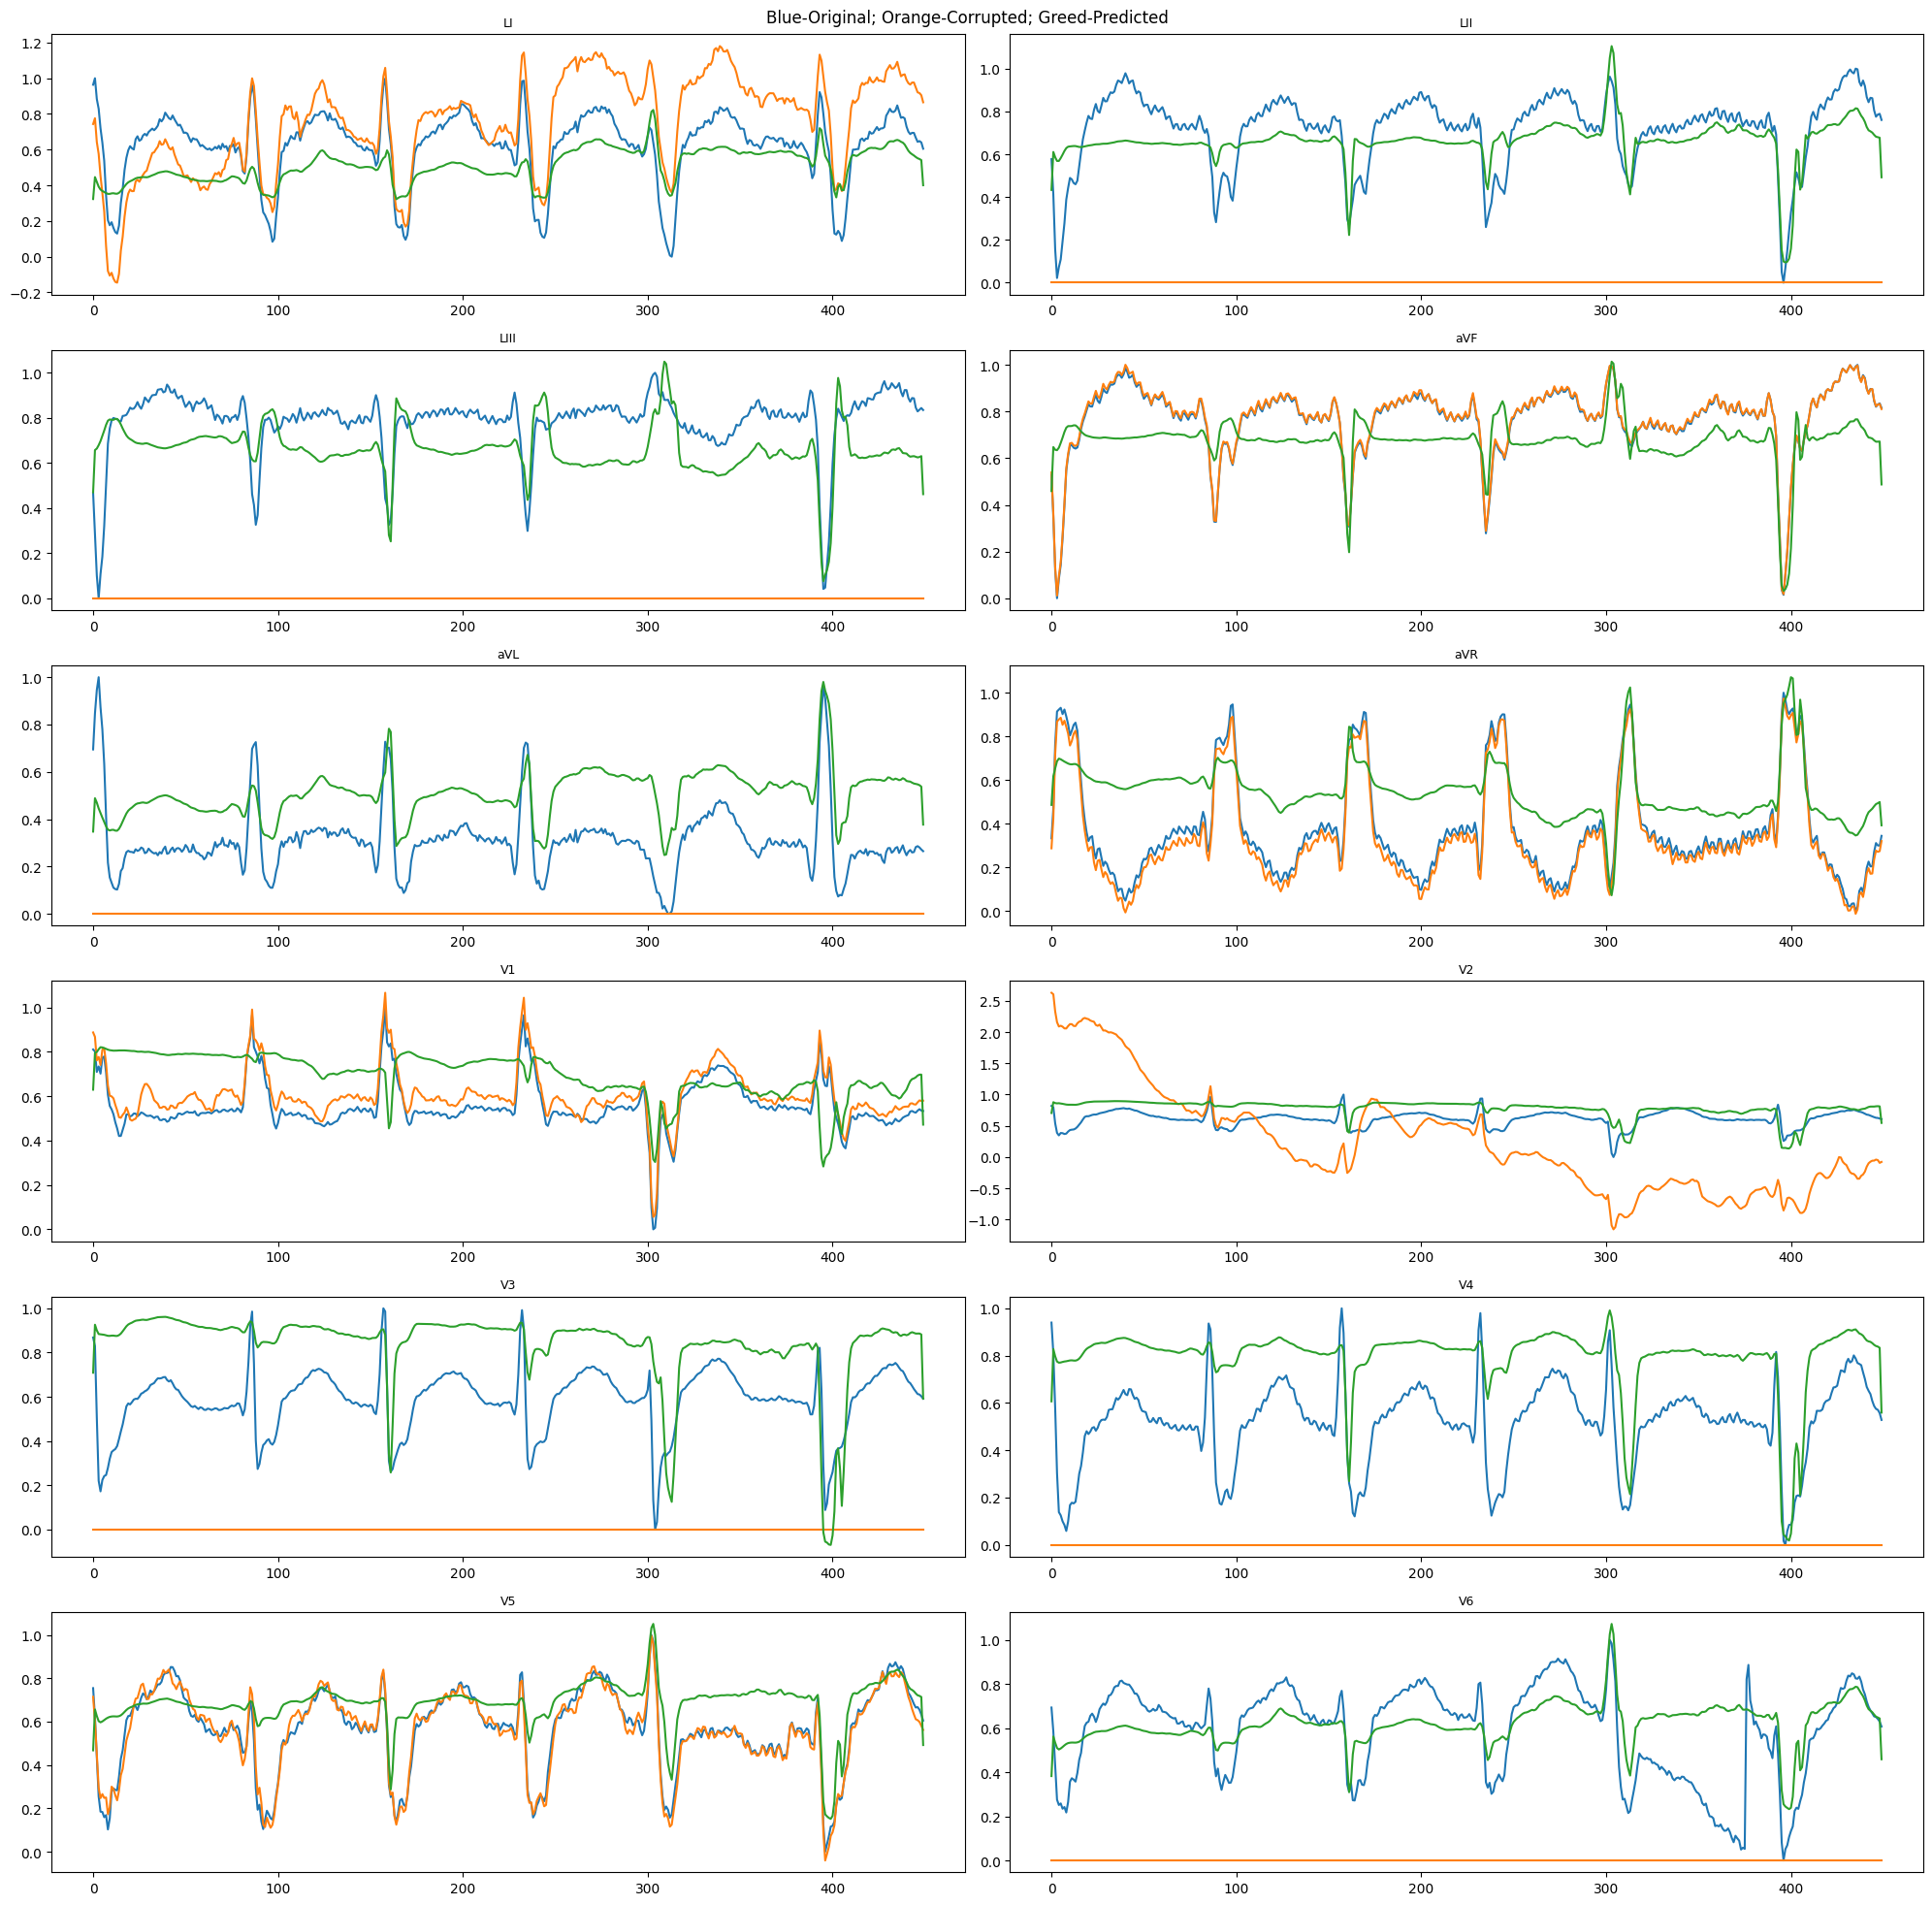

---------------------------------------------
Epoch: 01 | Time: 24m 36s
	Train Loss: 0.047
	 Val. Loss: 0.045
	 Best Val. Loss: 0.045
---------------------------------------------


100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


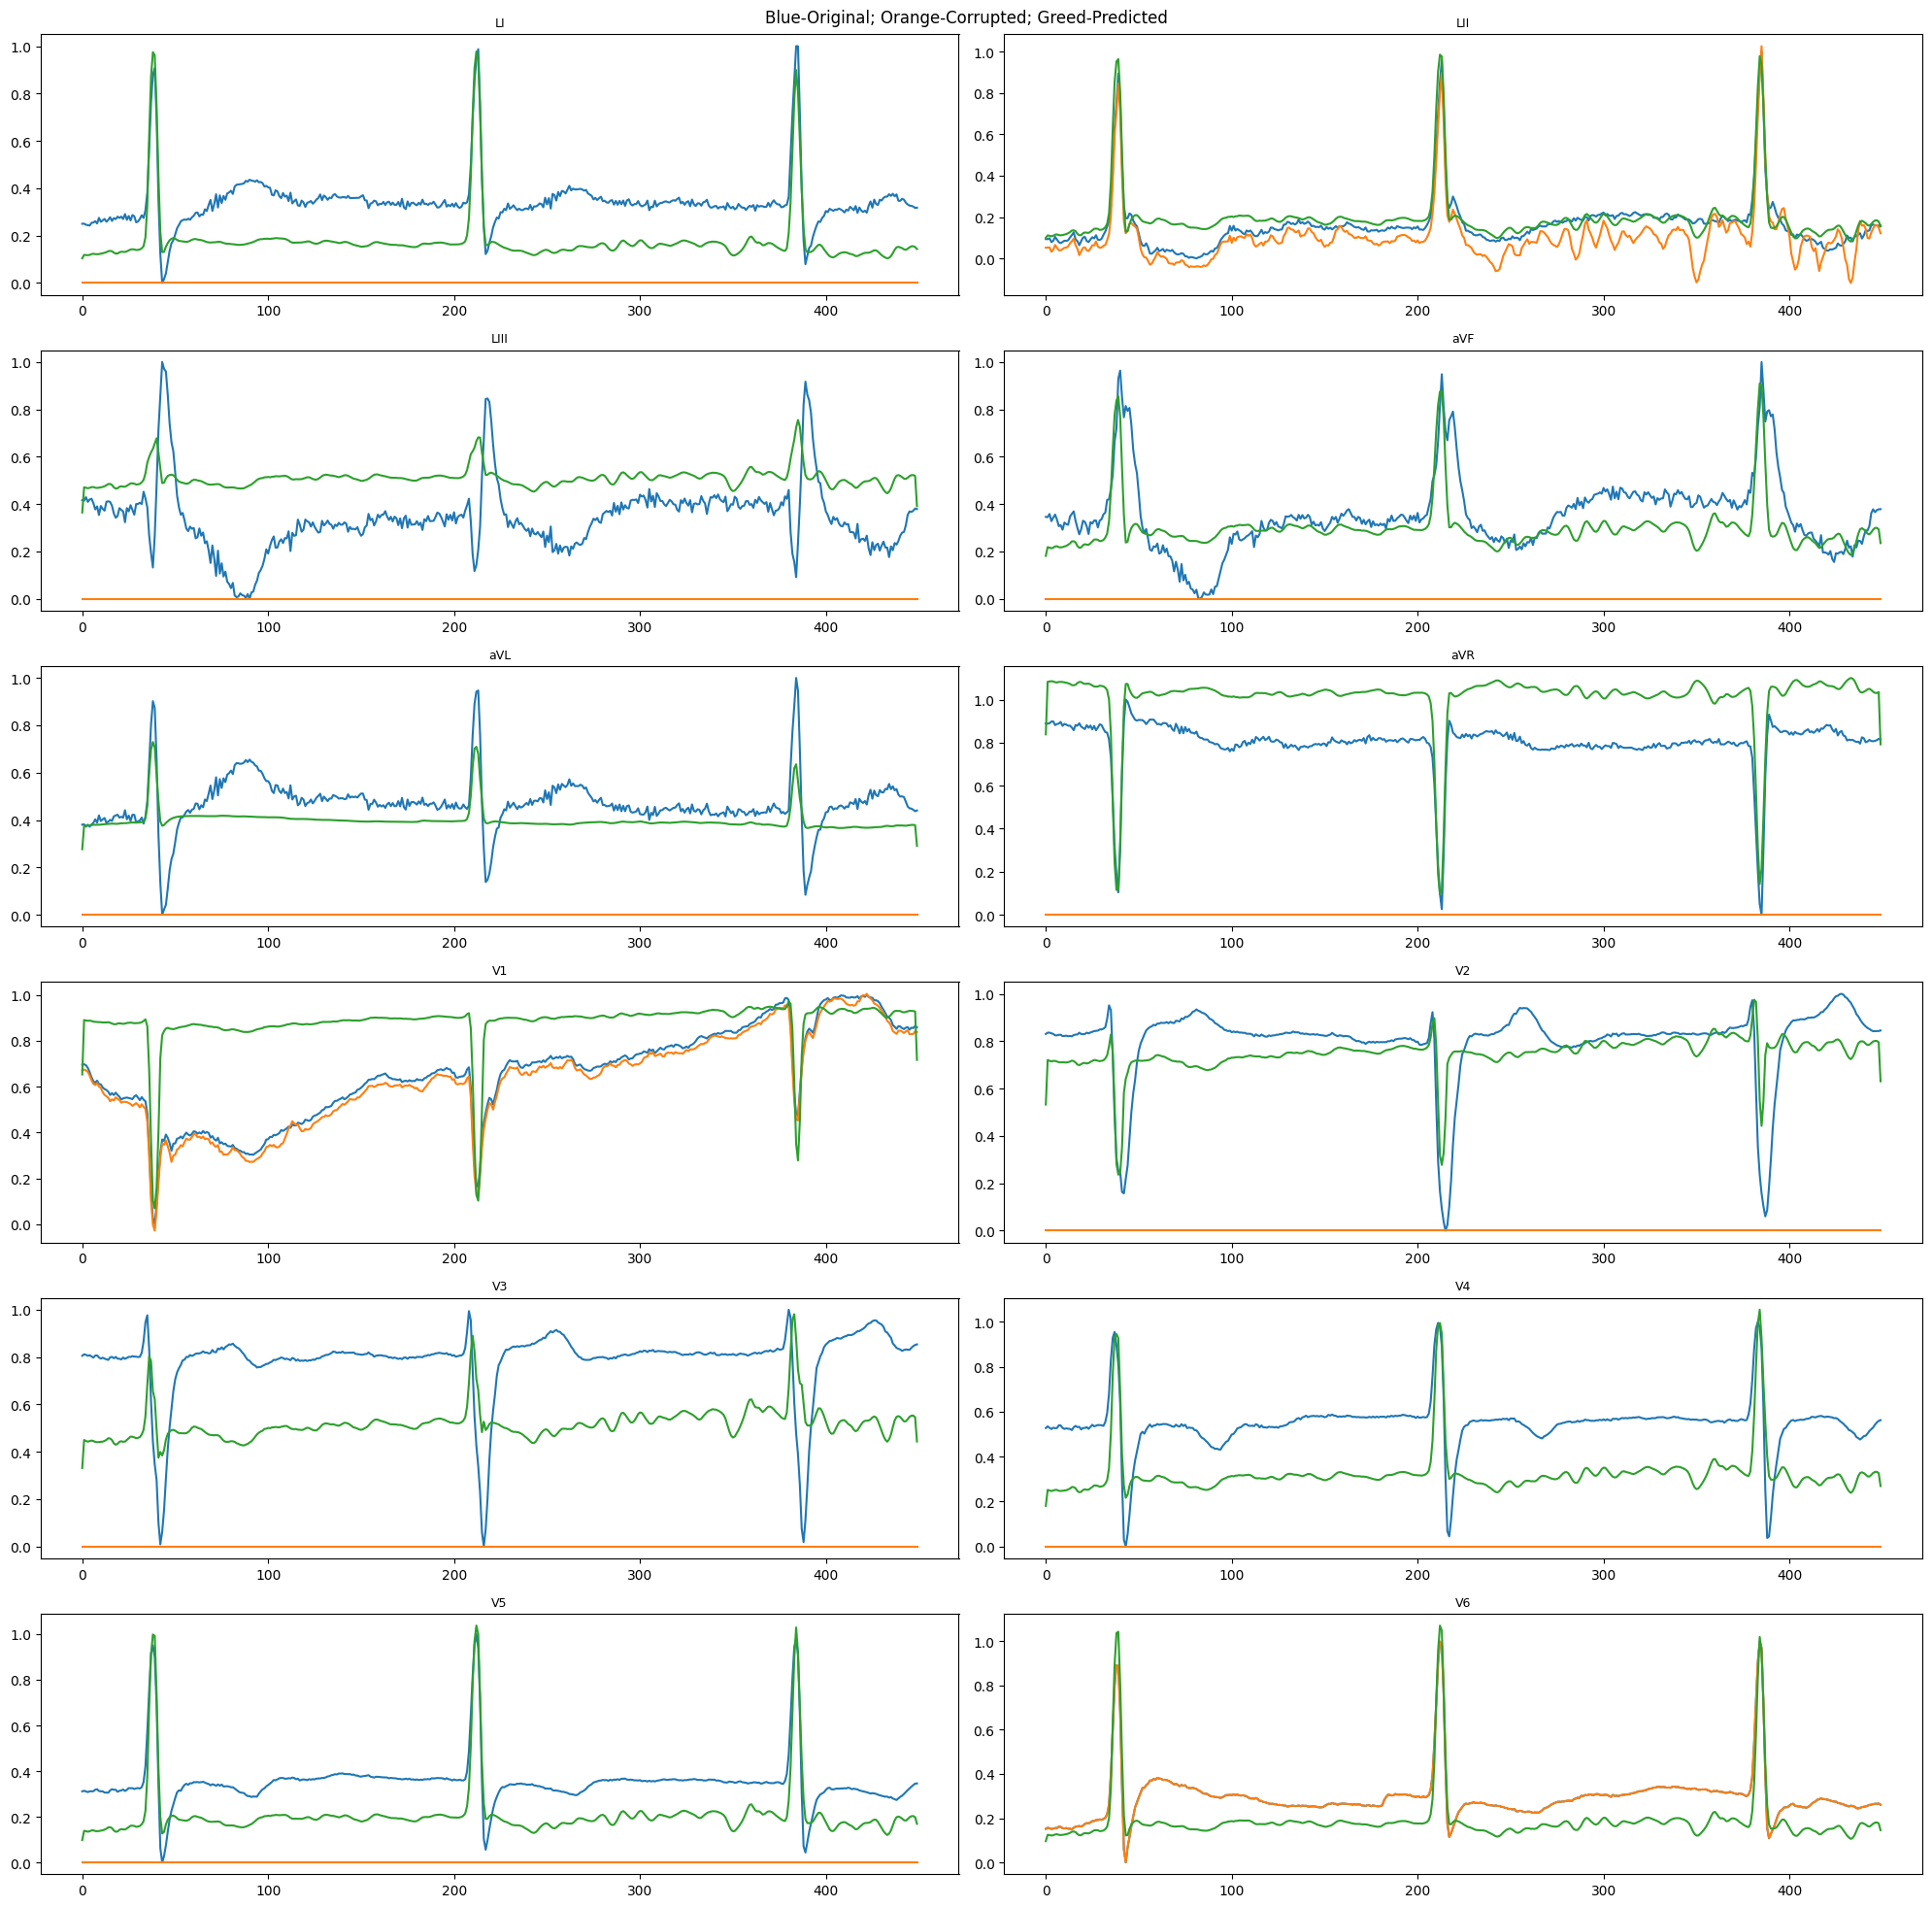

---------------------------------------------
Epoch: 02 | Time: 25m 12s
	Train Loss: 0.033
	 Val. Loss: 0.048
	 Best Val. Loss: 0.045
---------------------------------------------


100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


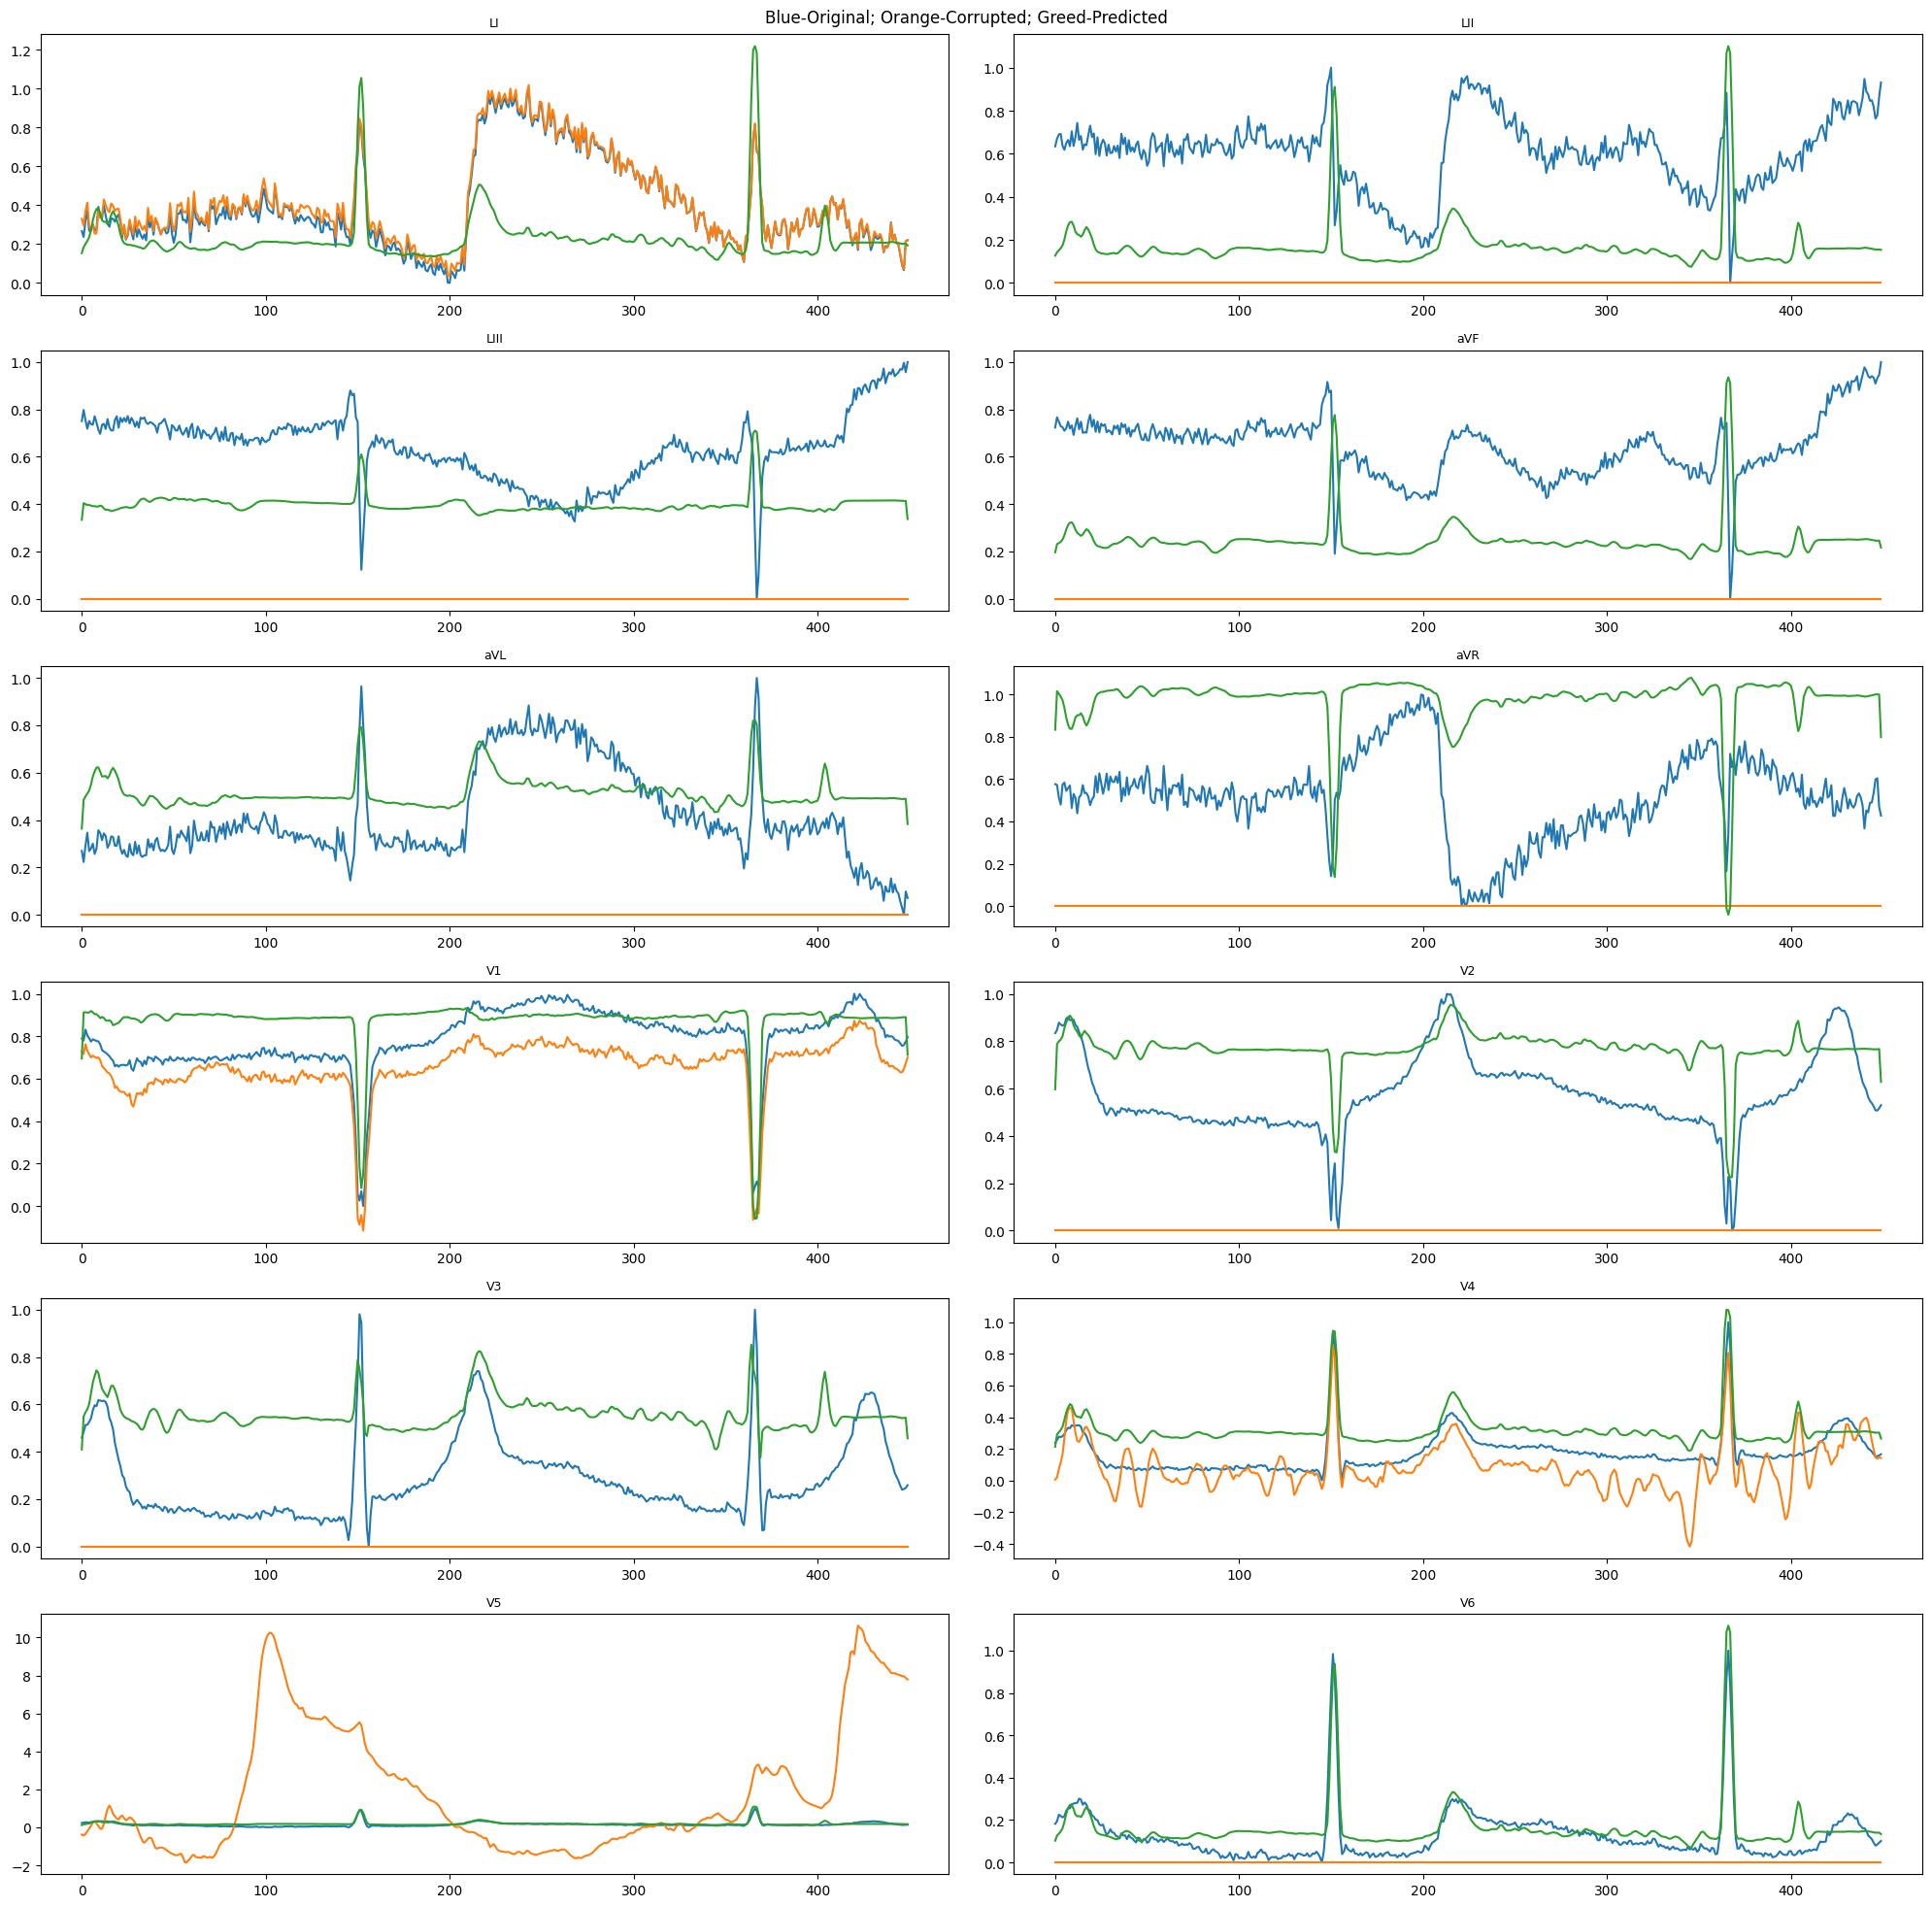

---------------------------------------------
Epoch: 03 | Time: 24m 44s
	Train Loss: 0.030
	 Val. Loss: 0.040
	 Best Val. Loss: 0.040
---------------------------------------------


100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


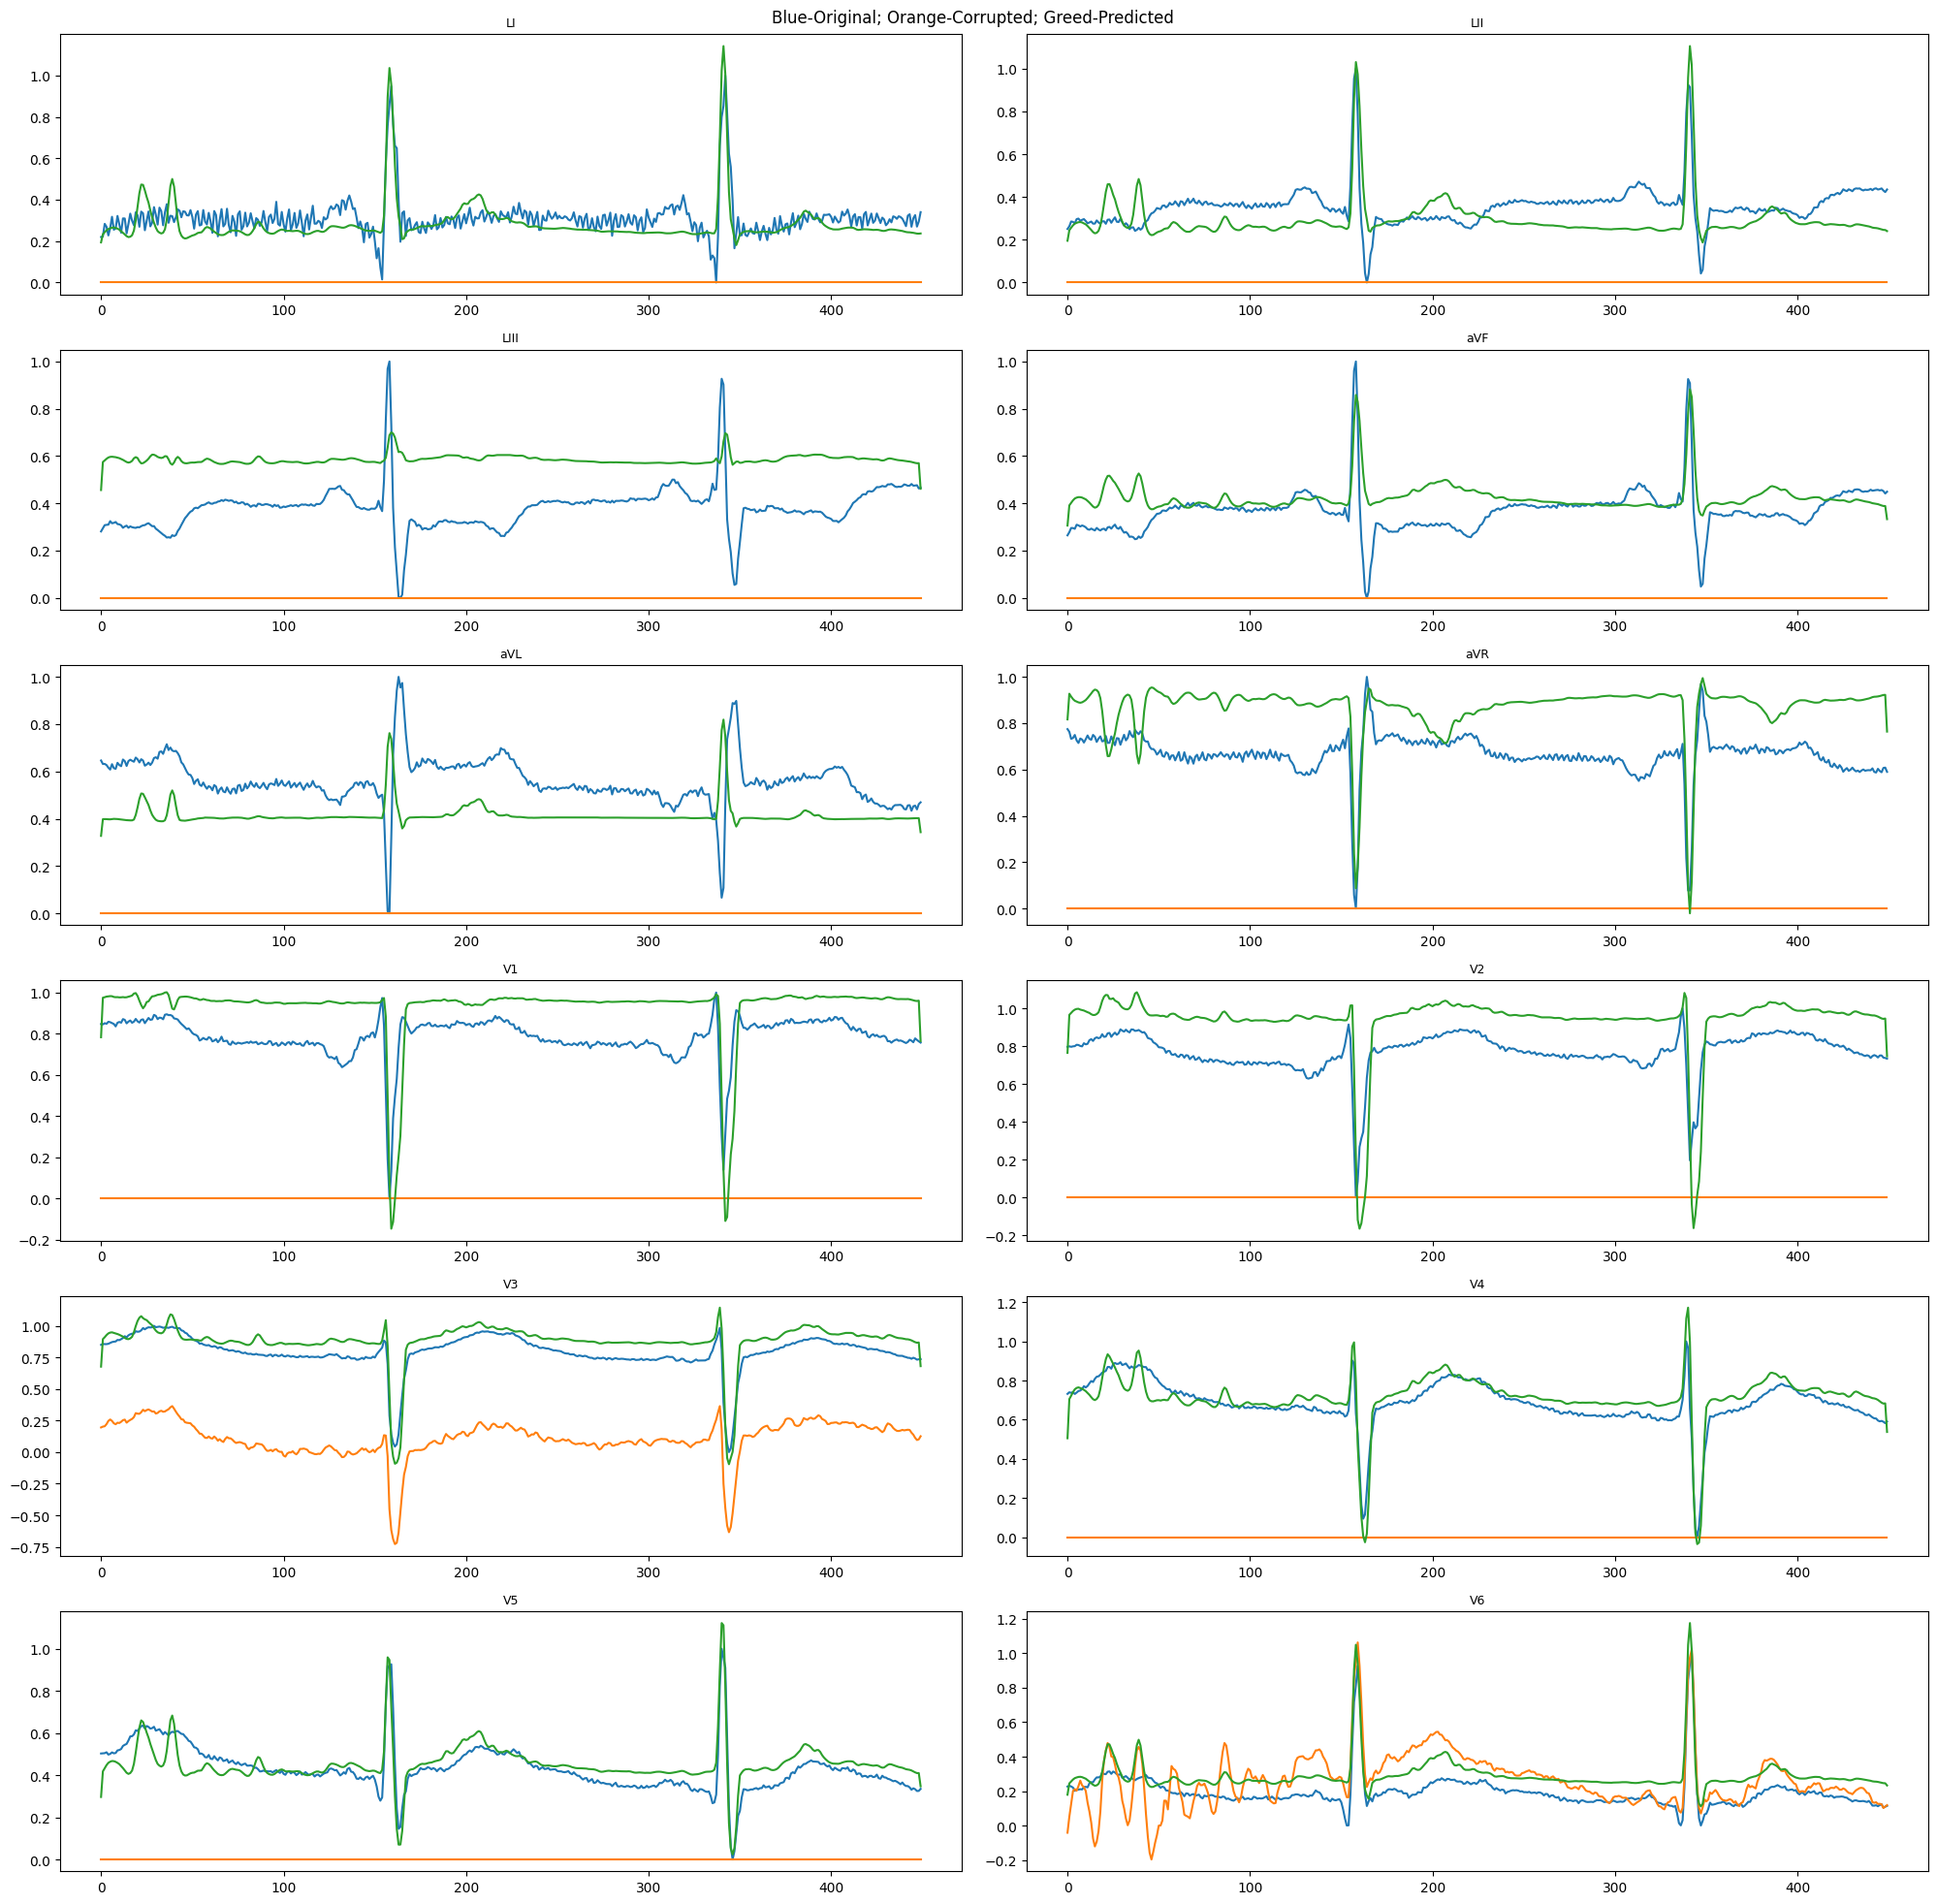

---------------------------------------------
Epoch: 04 | Time: 25m 36s
	Train Loss: 0.028
	 Val. Loss: 0.036
	 Best Val. Loss: 0.036
---------------------------------------------


100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


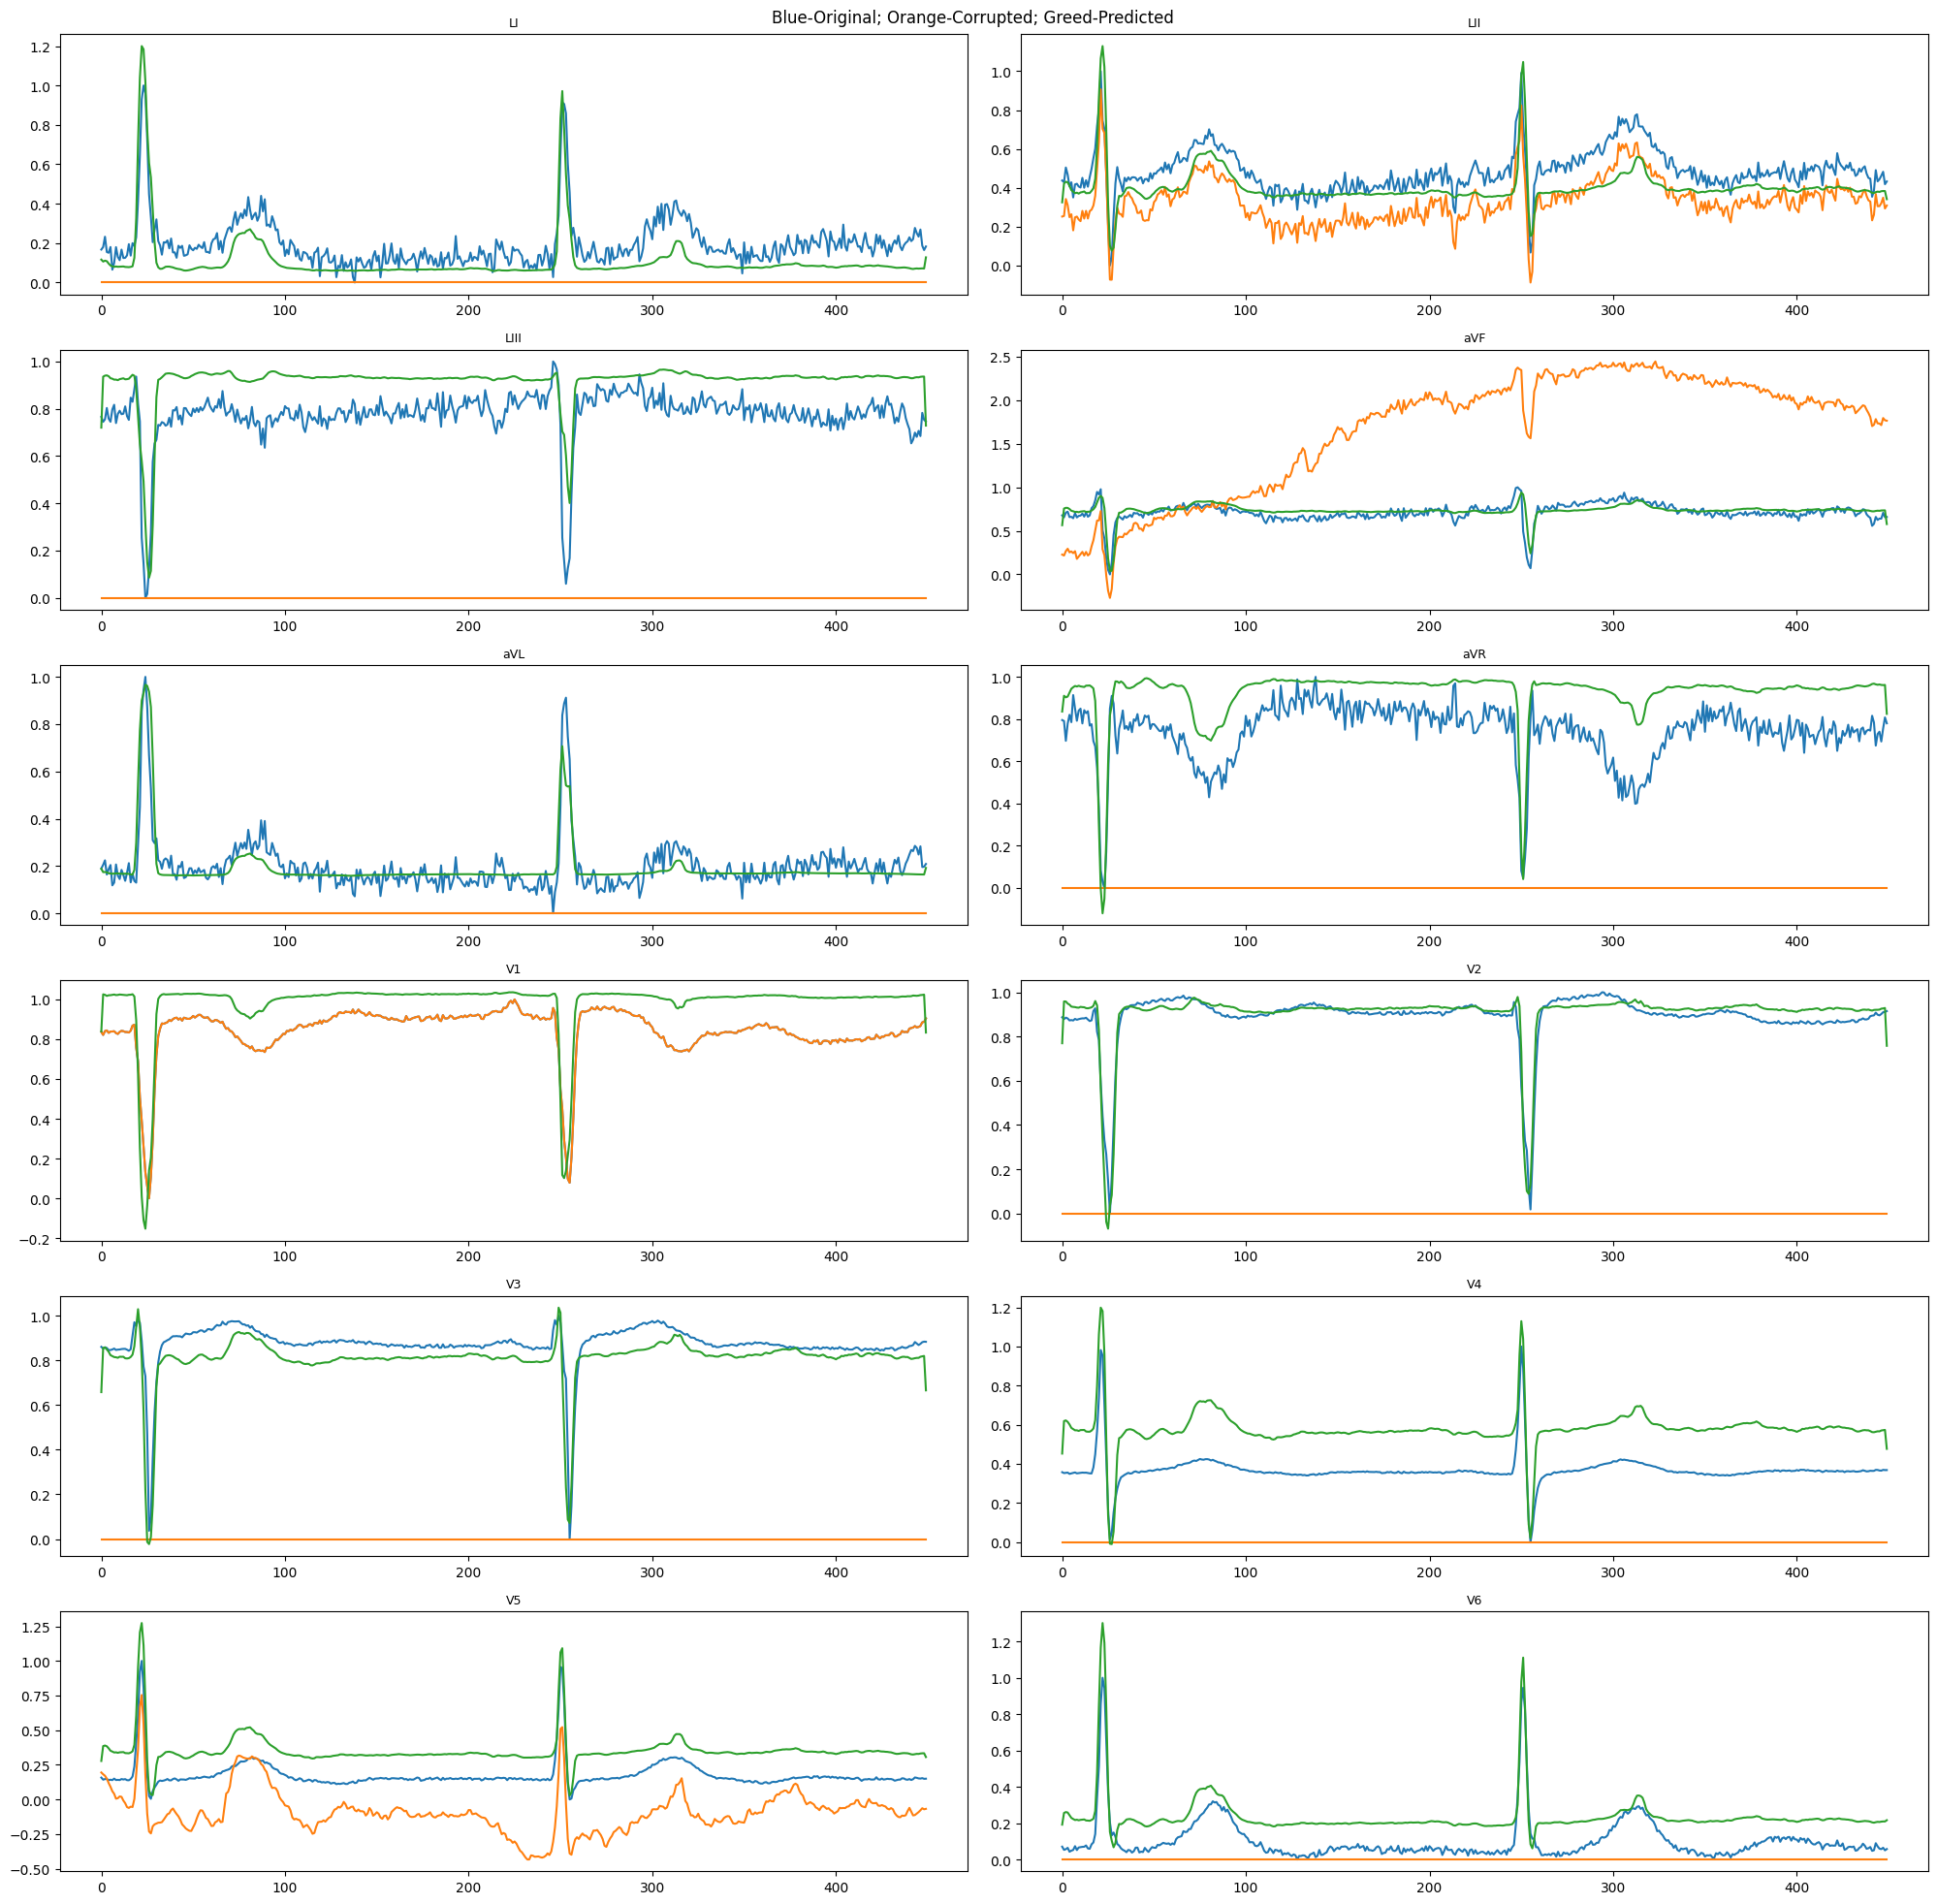

---------------------------------------------
Epoch: 05 | Time: 25m 14s
	Train Loss: 0.027
	 Val. Loss: 0.038
	 Best Val. Loss: 0.036
---------------------------------------------


100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


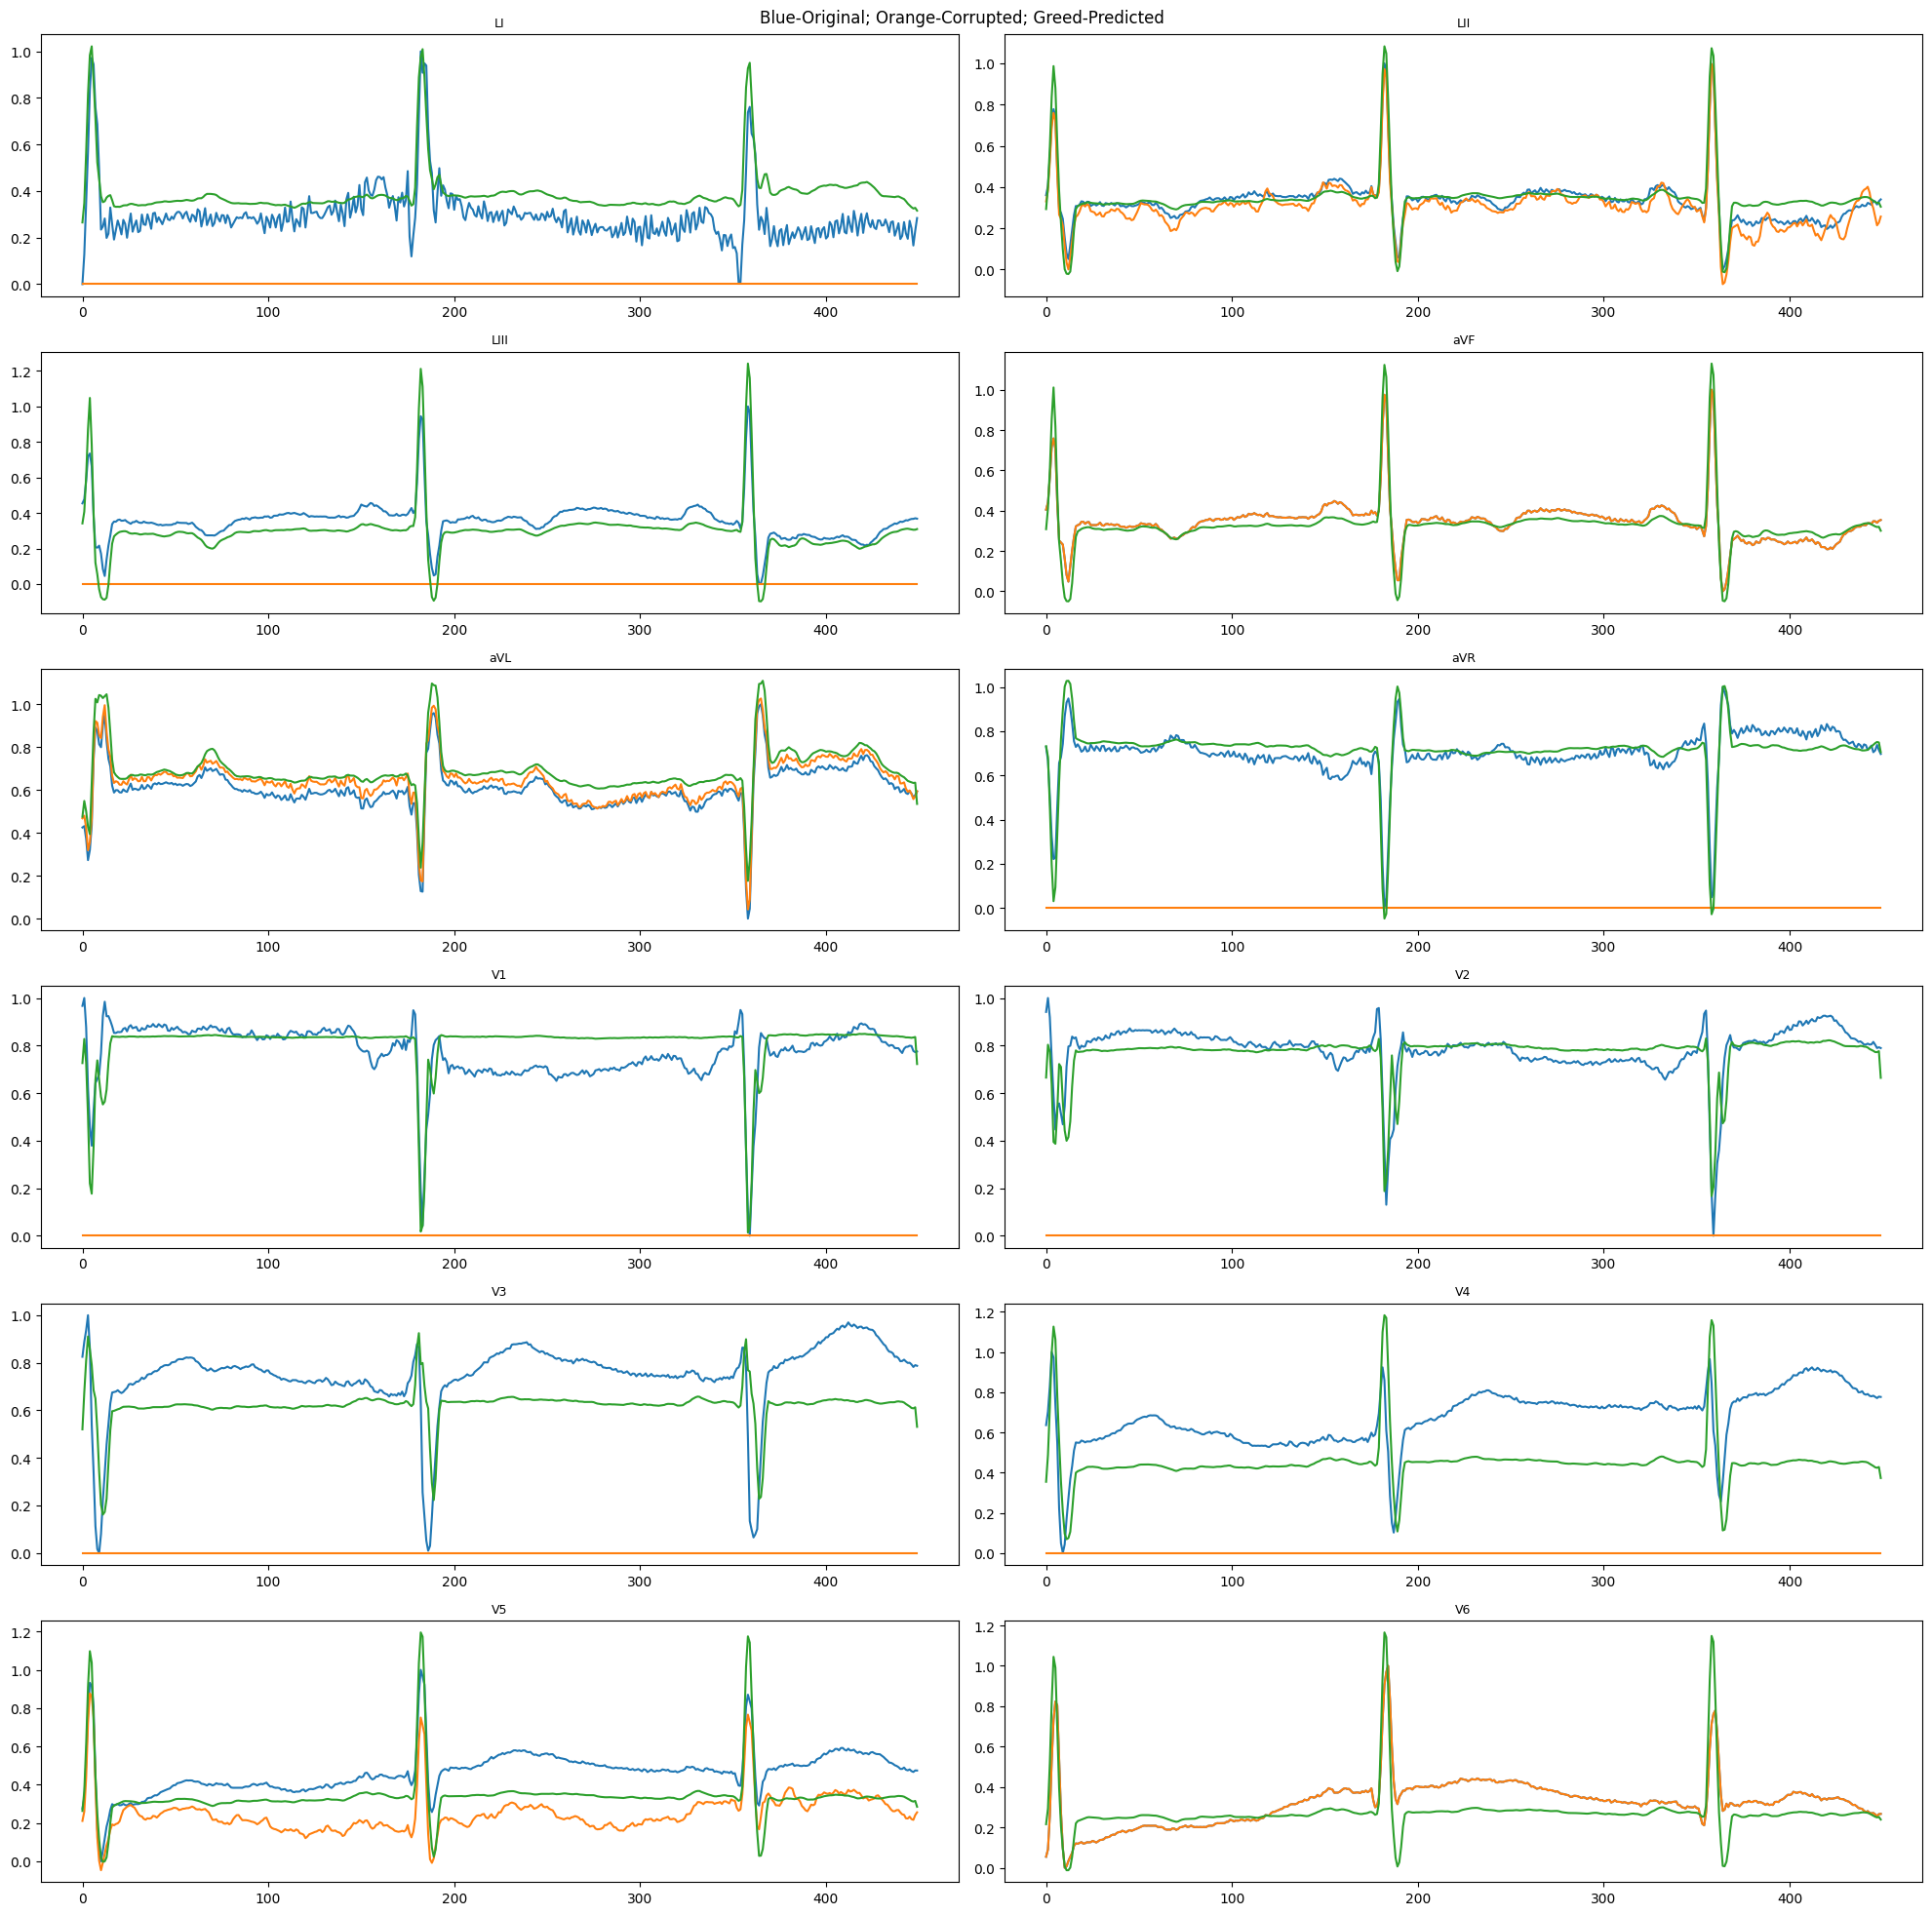

---------------------------------------------
Epoch: 06 | Time: 25m 56s
	Train Loss: 0.026
	 Val. Loss: 0.037
	 Best Val. Loss: 0.036
---------------------------------------------


100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


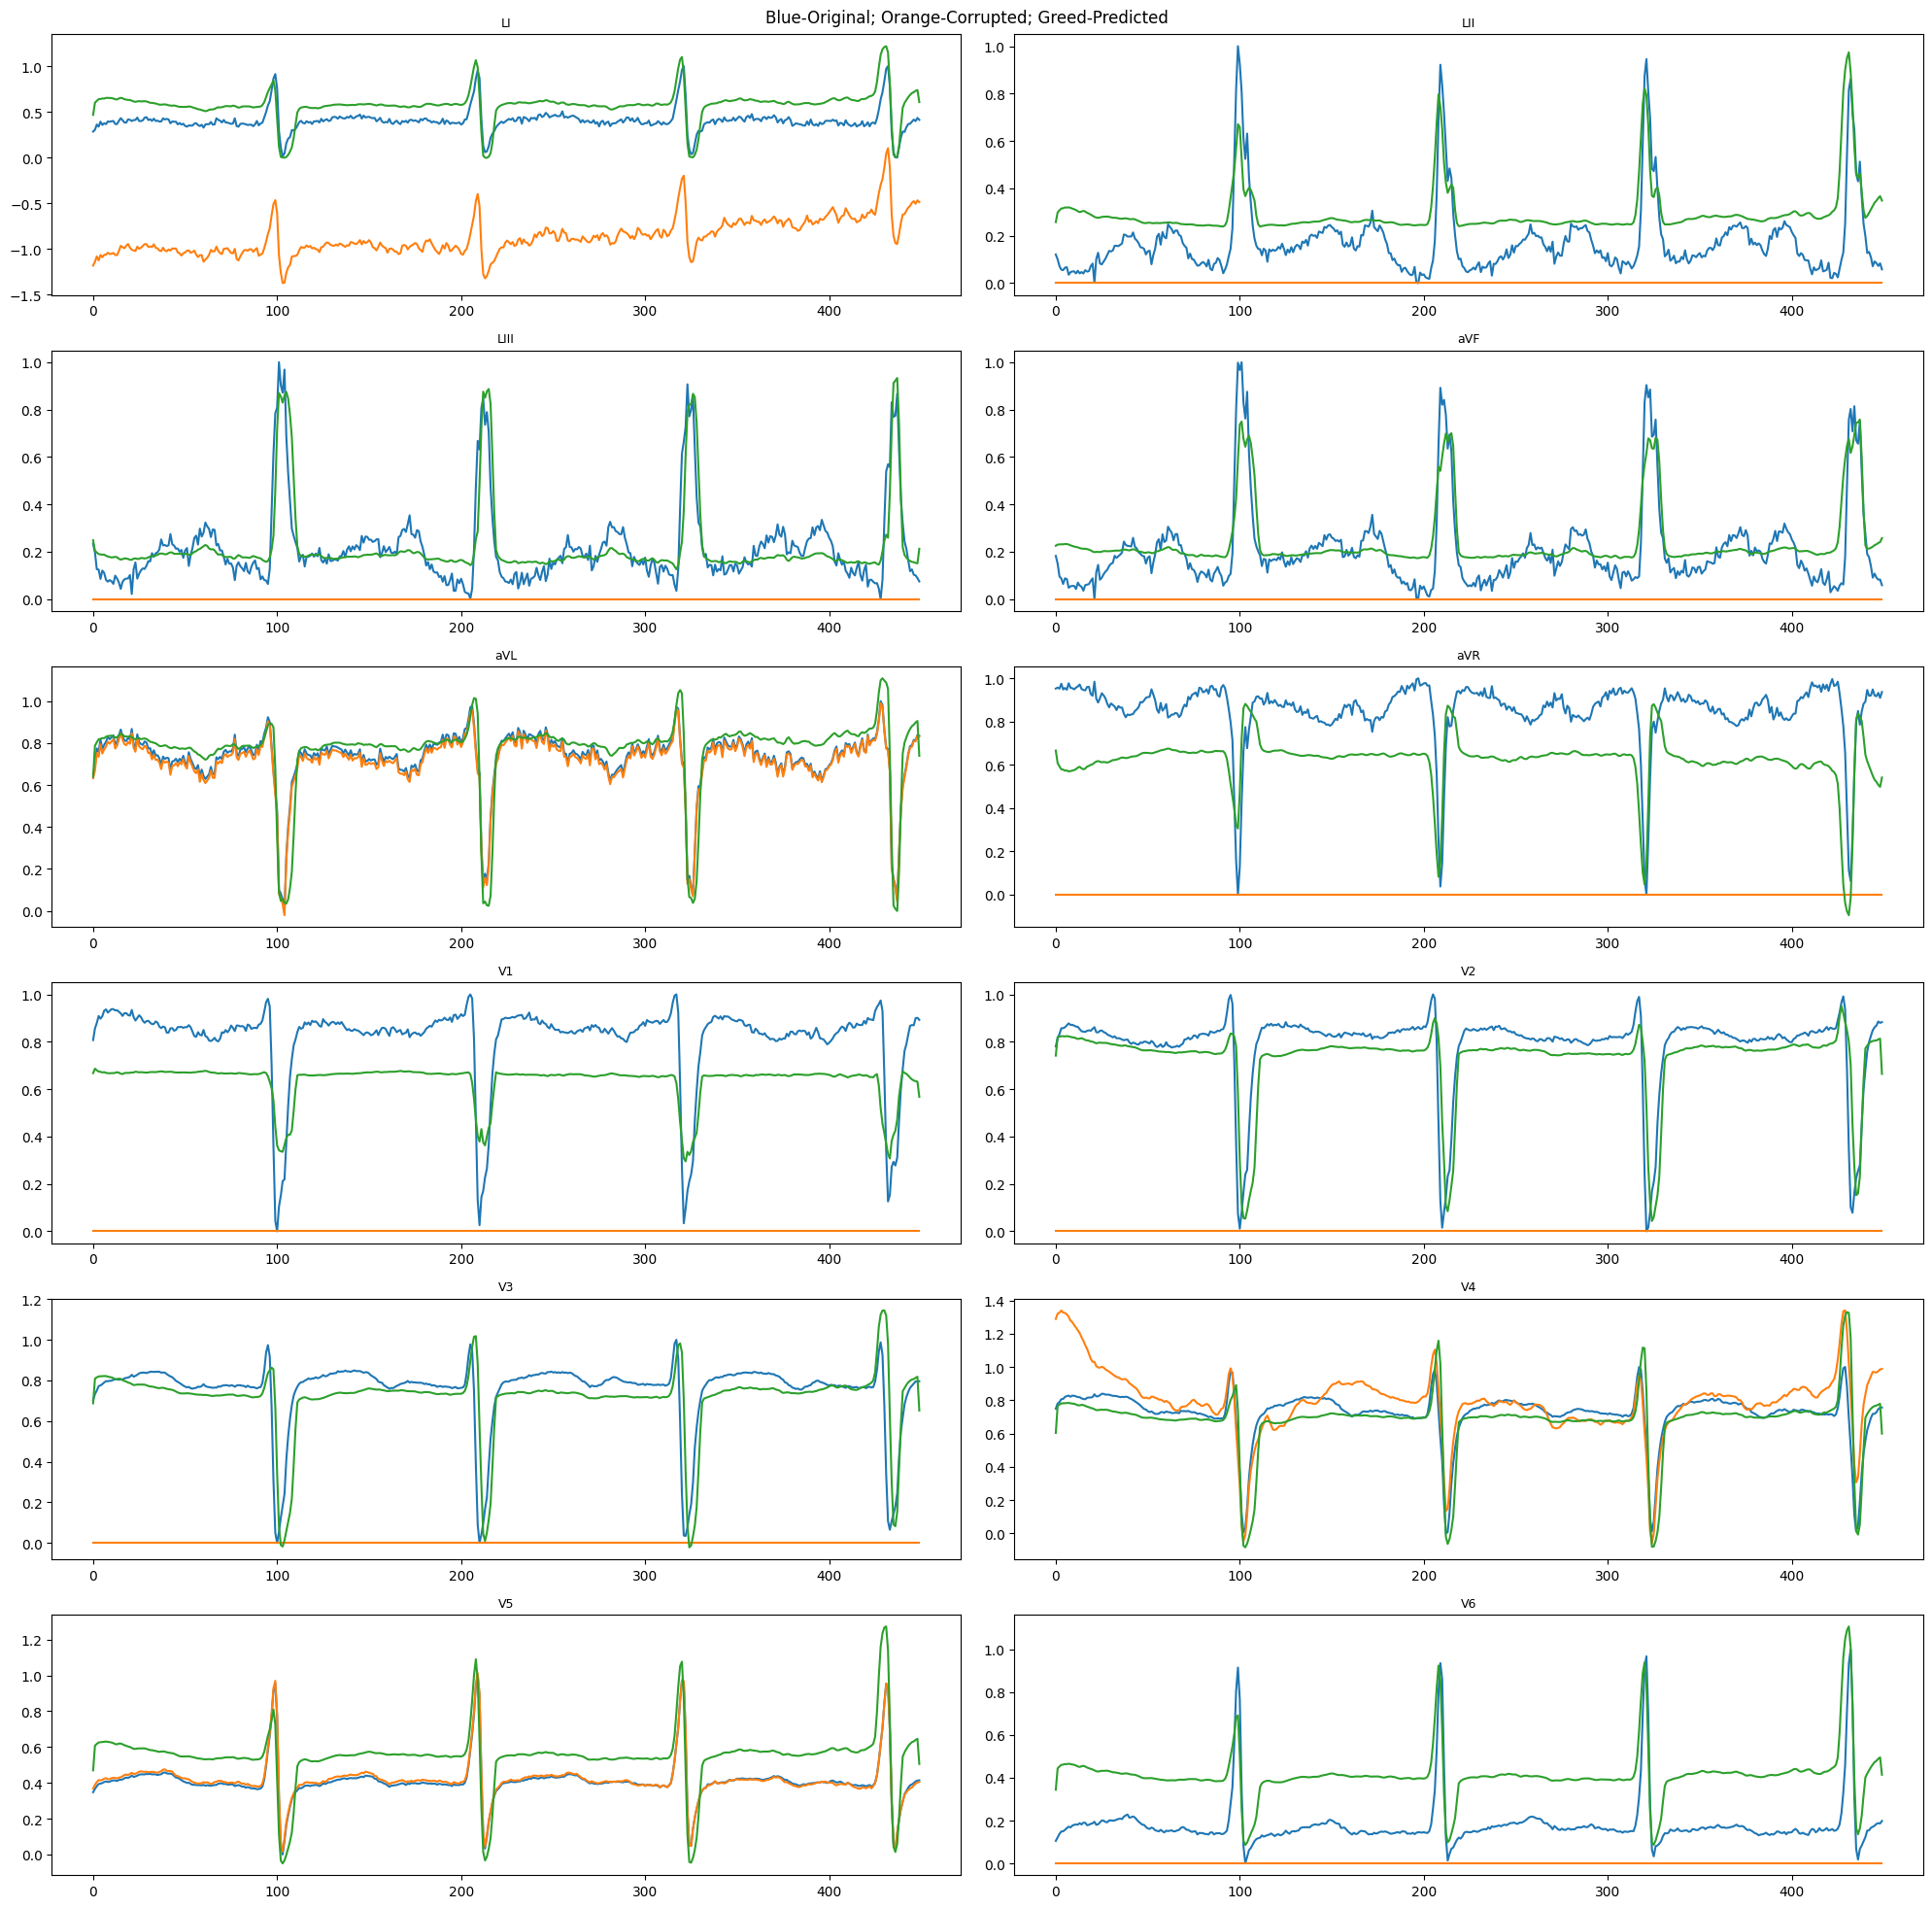

---------------------------------------------
Epoch: 07 | Time: 25m 12s
	Train Loss: 0.026
	 Val. Loss: 0.030
	 Best Val. Loss: 0.030
---------------------------------------------


100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


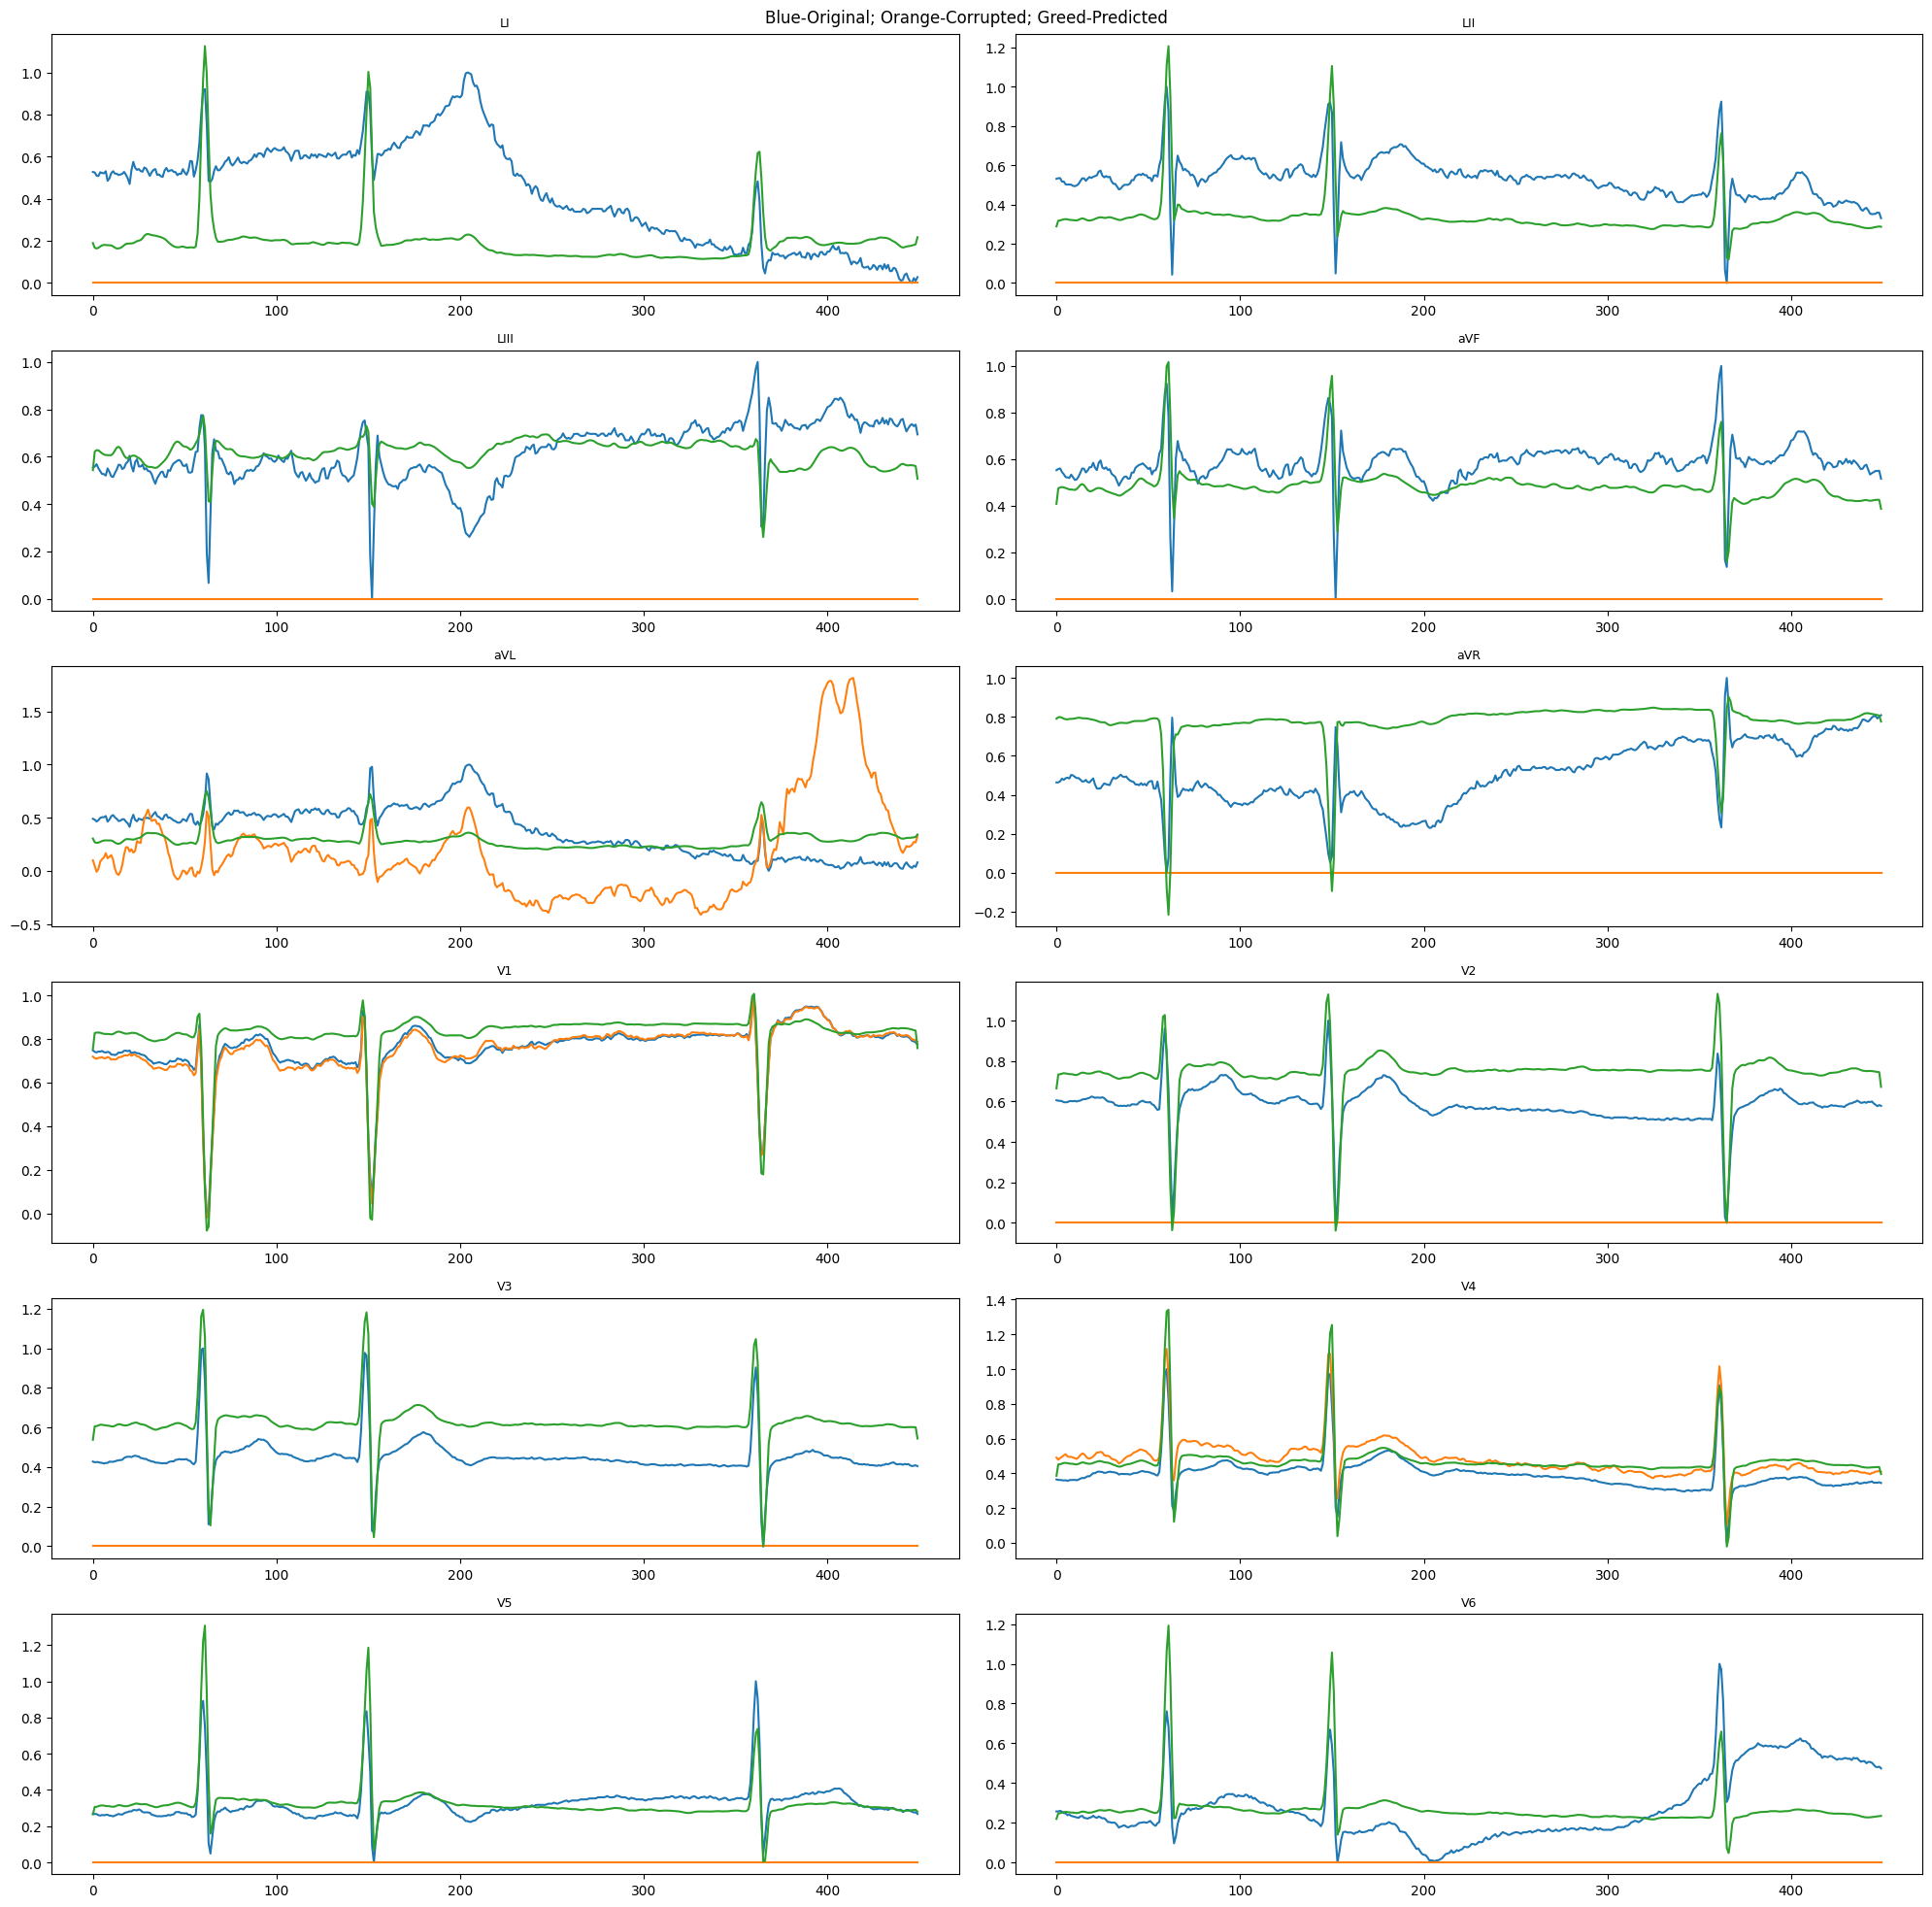

---------------------------------------------
Epoch: 08 | Time: 25m 38s
	Train Loss: 0.025
	 Val. Loss: 0.029
	 Best Val. Loss: 0.029
---------------------------------------------


100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


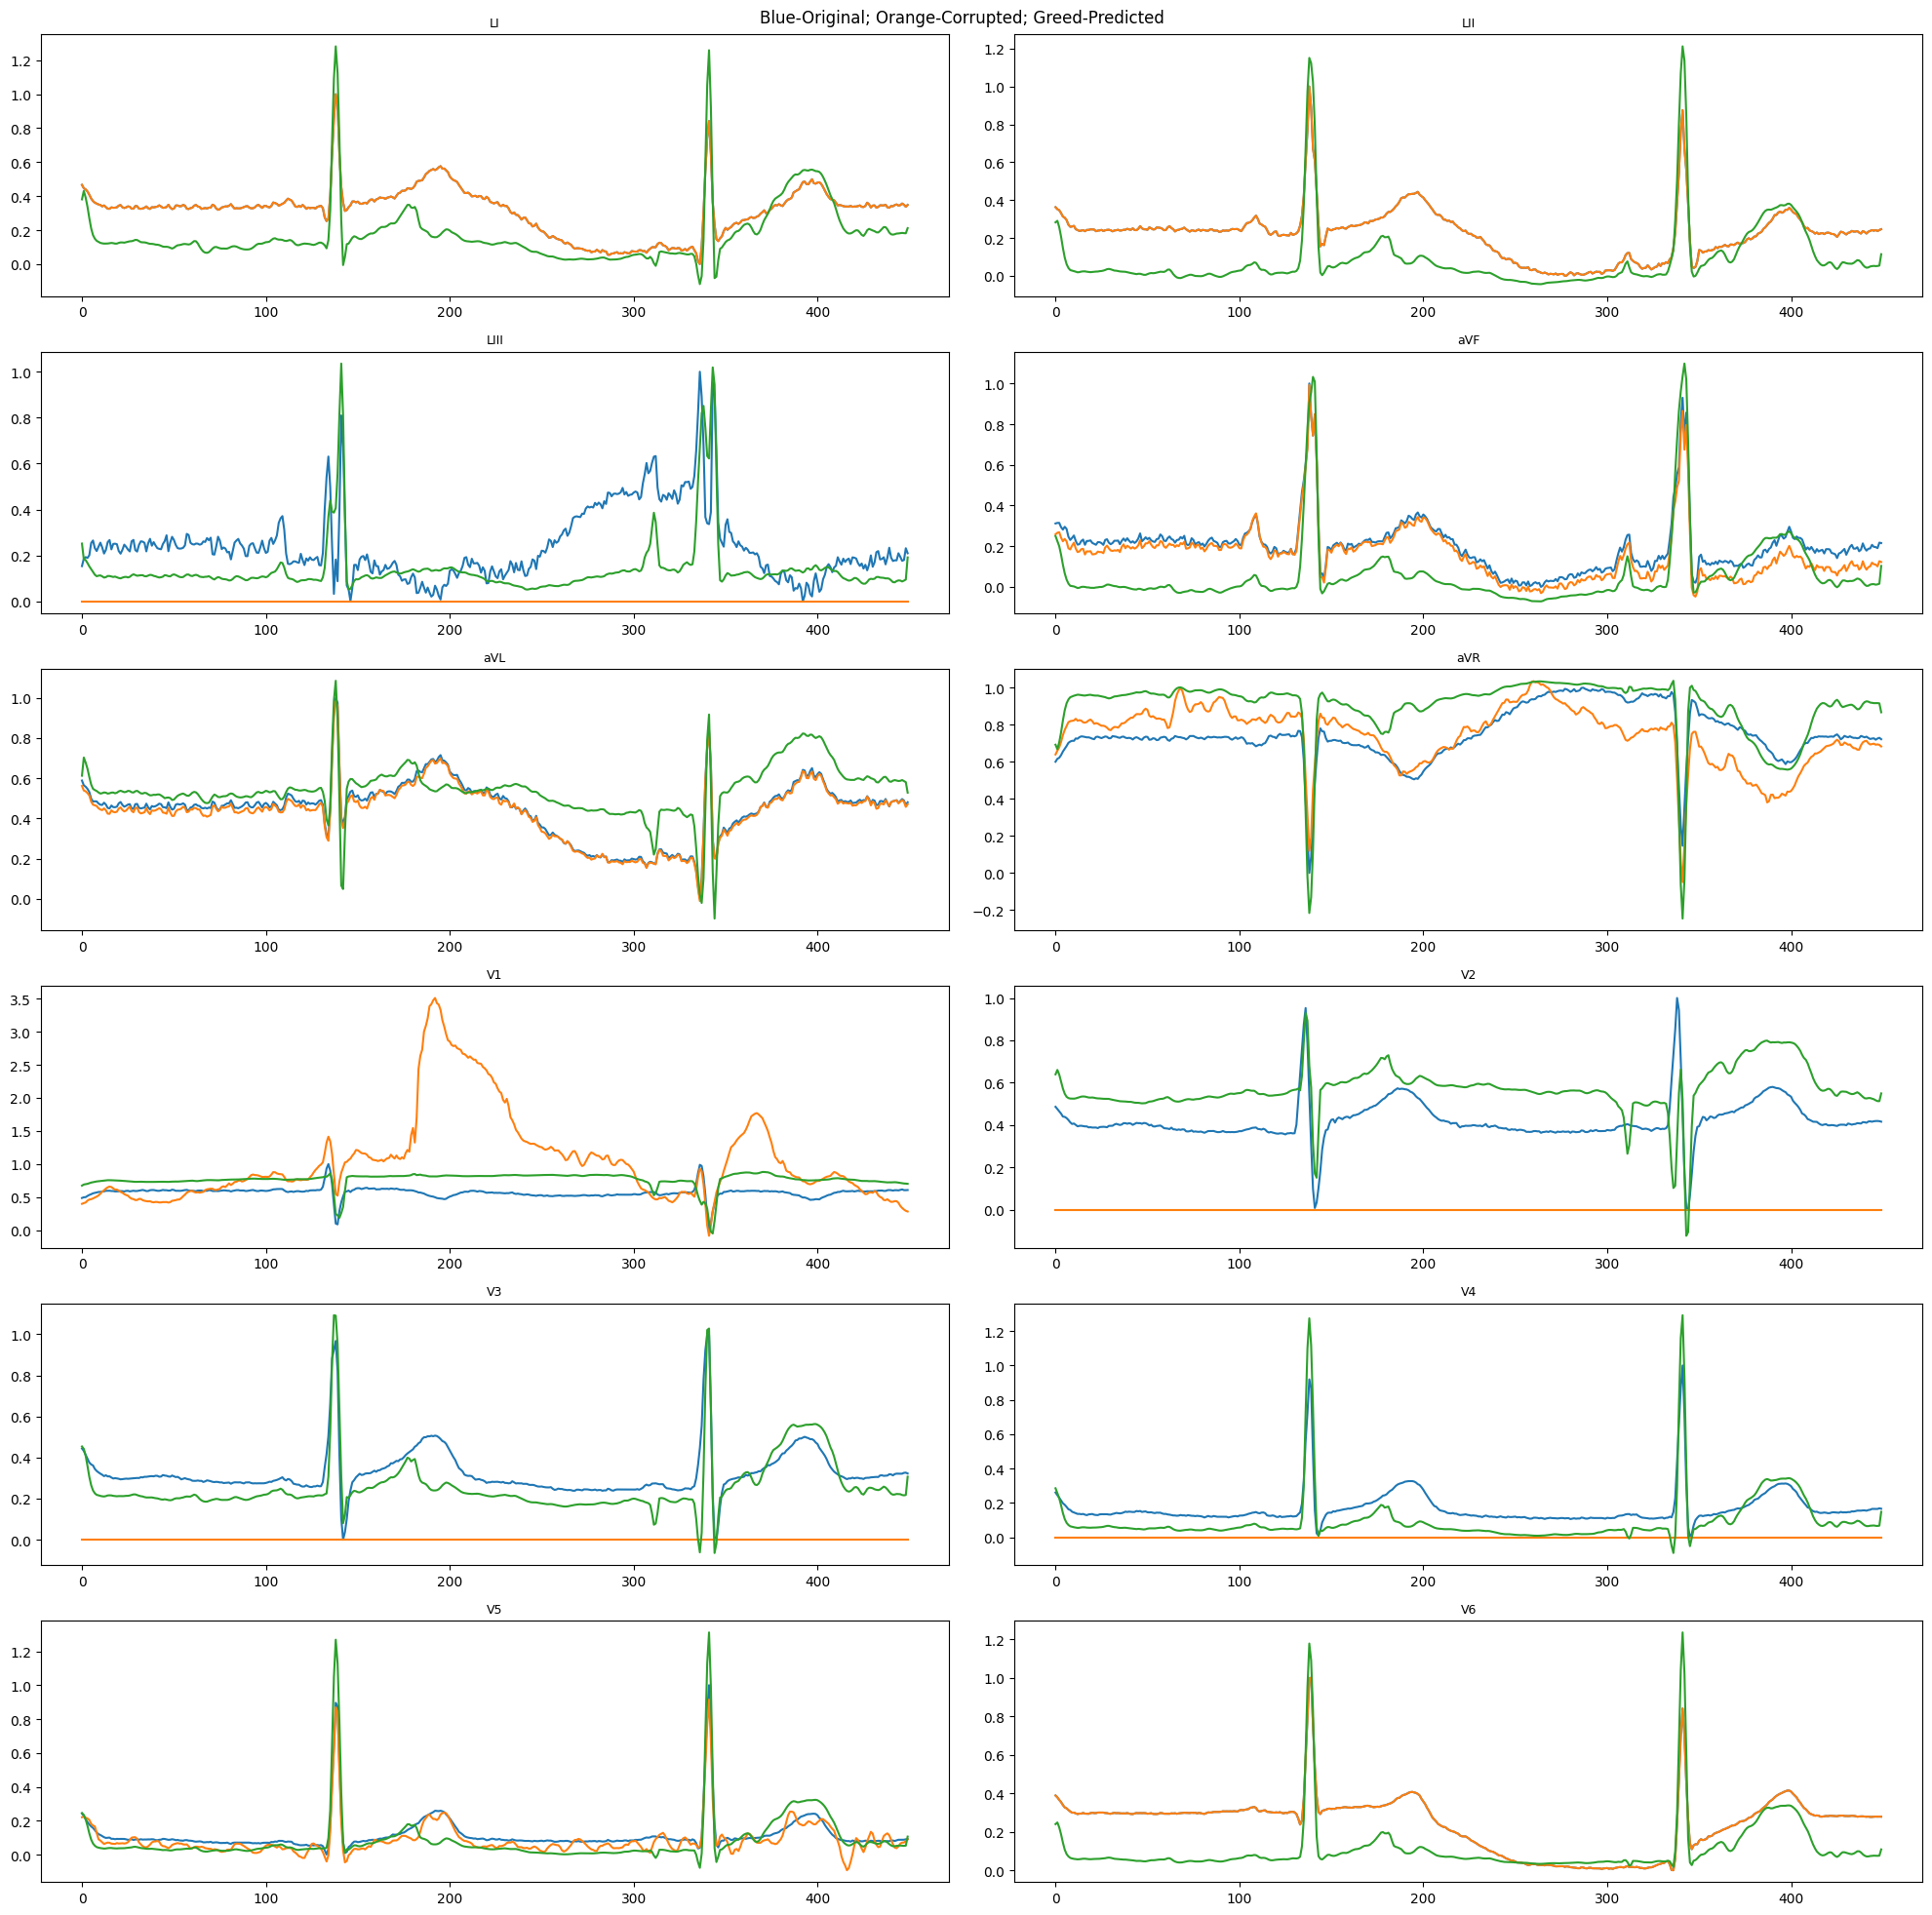

---------------------------------------------
Epoch: 09 | Time: 25m 7s
	Train Loss: 0.025
	 Val. Loss: 0.028
	 Best Val. Loss: 0.028
---------------------------------------------


Within epoch loss (training) 0.02437:  91%|█████████ | 1173/1291 [21:40<02:01,  1.03s/it] 

In [1]:
import os
import re

os.chdir('/home/david/Desktop/projects/thesis/upstream_seq2seq/')

# from executors.train_on_local_machine_mps import trainer
from executors.train_on_local_machine import trainer

scrutiny_probs =[None]*6+\
                ['Turn-off']*60+\
                ['MA']*4+\
                ['BW']*4+\
                ['EM']*4+\
                ['MA+BW']*4+\
                ['MA+EM']*4+\
                ['BW+EM']*4+\
                ['MA+BW+EM']*10

config = {
    # general
    'seed': 123,
    'data_folder_path': './data/processed/',
    # training,
    'batch_size': 32,
    'n_epochs': 30,
    # architecture - to be changed later and pushed out towards tuning,
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,               # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'decoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'window': 450 ,
    'train_by_sample': 1,
    'positional_encodings': False,
    'n_iters':  None,                      # plot intermediate results on validation every <n_iters> steps,
    'model_type': "encoder_cnn",
    'saving_path': './models/transformer_cnn_4heads',
    'plot_saving_path': './plots/transformer_cnn_4heads',
    'scrutiny_probs': scrutiny_probs,
}

trainer(**config)


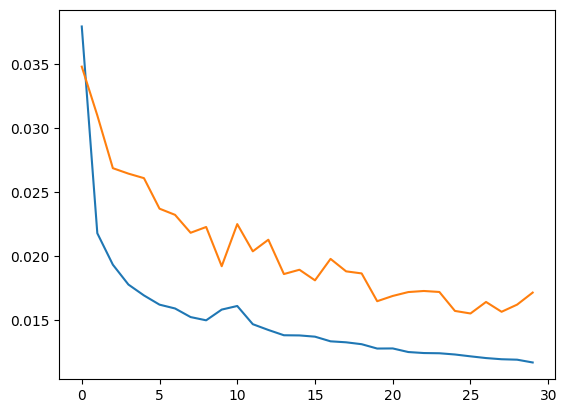

In [ ]:
import pickle
import matplotlib.pyplot as plt
with open('./models/transformer_cnn_4heads_loss.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)
plt.plot(loaded_dict['train'])
plt.plot(loaded_dict['validation'])
plt.show()